<a href="https://colab.research.google.com/github/xcarslan/cerenonetelent23/blob/main/TrainTestValid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import vgg16
from tensorflow.keras.optimizers import Adam, SGD
import scipy  #Used to upsample our image
import glob
import os
from PIL import Image



import numpy as np
import glob
from sklearn.metrics import confusion_matrix , accuracy_score
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from numpy.linalg import eigh

In [3]:
dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.
label = []  #Placeholders to define add labels. We will add 1 to all parasitized images and 0 to uninfected.

In [4]:
path = '/content/drive/MyDrive/Multiple Sclerosis/Control-Axial/*'
for f in glob.iglob(path):
    img1=cv2.imread(f)
    img1 = Image.fromarray(img1, 'RGB')
    img1 = img1.resize((224, 224))
    dataset.append(np.array(img1))
    label.append(0)

In [5]:
path = '/content/drive/MyDrive/Multiple Sclerosis/Control-Sagittal/*'
for f in glob.iglob(path):
    img3=cv2.imread(f)
    img3 = Image.fromarray(img3, 'RGB')
    img3 = img3.resize((224, 224))
    dataset.append(np.array(img3))
    label.append(2)

In [6]:
path = '/content/drive/MyDrive/Multiple Sclerosis/MS-Sagittal/*'
for f in glob.iglob(path):
    img4=cv2.imread(f)
    img4 = Image.fromarray(img4, 'RGB')
    img4 = img4.resize((224, 224))
    dataset.append(np.array(img4))
    label.append(3)

In [7]:
path = '/content/drive/MyDrive/Multiple Sclerosis/MS-Axial/*'
for f in glob.iglob(path):
    img2=cv2.imread(f)
    img2 = Image.fromarray(img2, 'RGB')
    img2 = img2.resize((224, 224))
    dataset.append(np.array(img2))
    label.append(1)

In [8]:
len(dataset)

3427

In [9]:
dataset = np.array(dataset)
label = np.array(label)

In [10]:
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import shutil

# Veri setini eğitim, doğrulama ve test setlerine ayırma
X_train, X_temp, y_train, y_temp = train_test_split(dataset, label, test_size=0.40, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=0)

# Normalizasyon ve one-hot encoding
X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0
y_train, y_val, y_test = to_categorical(y_train), to_categorical(y_val), to_categorical(y_test)

# Klasörleri oluşturma
base_dir = '/content/drive/MyDrive/MS-DENEME'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

for folder in ['train', 'val', 'test']:
    folder_path = os.path.join(base_dir, folder)
    if not os.path.exists(folder_path):
        os.mkdir(folder_path)
    for sub_folder in np.unique(label):
        sub_folder_path = os.path.join(folder_path, str(sub_folder))
        if not os.path.exists(sub_folder_path):
            os.mkdir(sub_folder_path)

# Görüntüleri ilgili klasörlere kaydetme
def save_images(images, labels, base_folder):
    for i, (img, label) in enumerate(zip(images, labels)):
        folder = os.path.join(base_folder, str(np.argmax(label)))
        img_path = os.path.join(folder, f'image_{i}.png')
        img = (img * 255).astype(np.uint8)
        im = Image.fromarray(img)
        im.save(img_path)

# Eğitim, doğrulama ve test setlerini kaydet
save_images(X_train, y_train, os.path.join(base_dir, 'train'))
save_images(X_val, y_val, os.path.join(base_dir, 'val'))
save_images(X_test, y_test, os.path.join(base_dir, 'test'))


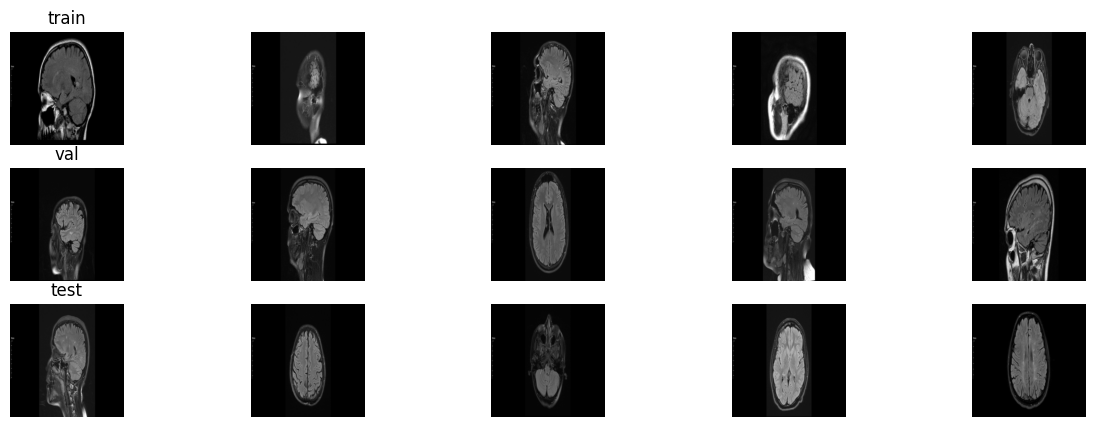

In [11]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Klasör yollarını belirle
base_dir = '/content/drive/MyDrive/MS-DENEME'
categories = ['train', 'val', 'test']

plt.figure(figsize=(15, 5))

# Her kategori için beşer fotoğraf seç ve göster
for i, category in enumerate(categories):
    category_path = os.path.join(base_dir, category)
    all_images = []

    # Tüm fotoğrafları al
    for label_folder in os.listdir(category_path):
        label_folder_path = os.path.join(category_path, label_folder)
        images = [os.path.join(label_folder_path, img) for img in os.listdir(label_folder_path)]
        all_images.extend(images)

    # Rastgele beş fotoğraf seç
    selected_images = random.sample(all_images, 5)

    # Seçilen fotoğrafları görselleştir
    for j, img_path in enumerate(selected_images, 1):
        plt.subplot(3, 5, i * 5 + j)
        img = Image.open(img_path)
        plt.imshow(img)
        plt.axis('off')
        if j == 1:
            plt.title(category)

plt.show()
